In [1]:
install.packages("tidyverse")
install.packages("readxl")
install.packages("tidymodels")

Installing package into 'C:/Users/My Lan/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\My Lan\AppData\Local\Temp\RtmpcVrHvN\downloaded_packages


Installing package into 'C:/Users/My Lan/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'readxl' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\My Lan\AppData\Local\Temp\RtmpcVrHvN\downloaded_packages


Installing package into 'C:/Users/My Lan/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)

also installing the dependencies 'cli', 'purrr'





  There is a binary version available but the source version is later:
           binary source needs_compilation
tidymodels  1.2.0  1.3.0             FALSE

package 'cli' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'cli'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\My Lan\AppData\Local\R\win-library\4.4\00LOCK\cli\libs\x64\cli.dll to C:\Users\My Lan\AppData\Local\R\win-library\4.4\cli\libs\x64\cli.dll: Permission denied"
Warning message:
"restored 'cli'"


package 'purrr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\My Lan\AppData\Local\Temp\RtmpcVrHvN\downloaded_packages


installing the source package 'tidymodels'


Warning message in install.packages("tidymodels"):
"installation of package 'tidymodels' had non-zero exit status"


In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
library(readxl)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────────────────────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.7     ✔ rsample      1.2.1
✔ dials        1.4.0     ✔ tune         1.3.0
✔ infer        1.0.7     ✔ workflows    1.2.0
✔ modeldata    1.4.0     ✔ workflowsets 1.1.0
✔ parsnip      1.3.0     ✔ yardstick    1.3.2
✔ recipes      1.1.1

In [3]:
data_combined <- read_excel("REXData8Feb2025.xlsx", sheet = "Combined")
head(data_combined)
colnames(data_combined) <- gsub(" ", "_", colnames(data_combined))
data_combined$Group <- as.factor(data_combined$Group)

New names:
• `` -> `...96`
• `` -> `...97`
• `` -> `...98`
• `` -> `...99`
• `` -> `...100`
• `` -> `...101`
• `` -> `...102`
• `` -> `...103`
• `` -> `...104`
• `` -> `...105`
• `` -> `...106`
• `` -> `...107`
• `` -> `...108`
• `` -> `...109`
• `` -> `...110`
• `` -> `...111`
• `` -> `...112`
• `` -> `...113`
• `` -> `...114`
• `` -> `...115`
• `` -> `...116`


PImID,SubstudyID (All),rbc_shift,inflation,rbc_m_ratio,vent_defect_pct,vent_low_pct,vent_high_pct,rbc_defect_pct,rbc_low_pct,⋯,...107,...108,...109,...110,...111,...112,...113,...114,...115,...116
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>
PIm0067,CANUCK1058,218.3458,3.242828,0.495,1.779580,13.762340,15.38288,0.2362108,7.465580,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
PIm0327,CANUCK1181,216.2458,3.197052,0.590,2.444612,10.554500,16.71042,0.7435973,6.796422,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
PIm0070,CANUCK1034,218.4715,3.356506,0.478,1.011947,11.976979,20.03982,1.7065808,10.205844,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
PIm0142,CANUCK1074,219.0143,4.874664,0.590,1.286522,9.113959,19.41865,1.6727915,15.362511,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
PIm0184,CANUCK1079,218.3623,3.380524,0.565,1.178085,11.567801,23.99863,1.2331525,11.247326,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
PIm0310,CANUCK1152,219.0319,4.803741,0.738,2.100261,14.994695,14.42484,0.4389838,2.130755,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


Warning message:
"Removed 19 rows containing non-finite outside the scale range (`stat_boxplot()`)."
Warning message:
"Removed 19 rows containing missing values or values outside the scale range (`geom_point()`)."


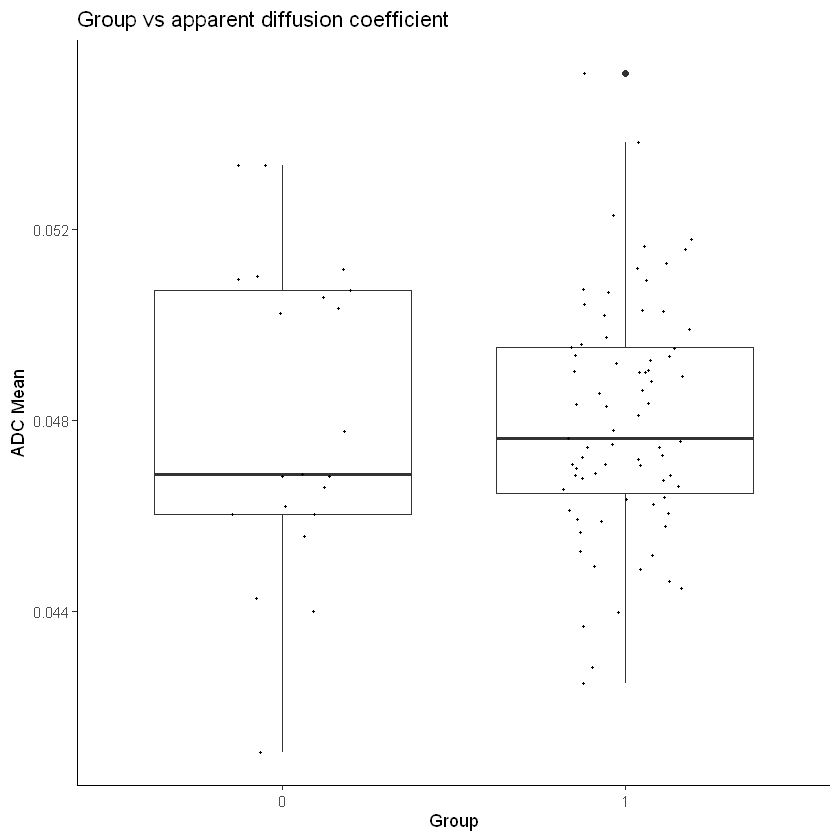

In [4]:
ggplot(data_combined) + 
  geom_boxplot(aes(x=Group, y = ADC_Mean))+
  geom_jitter(aes(x=Group, y = ADC_Mean), width = 0.2, height = 0,
              shape = 16, size = 0.5, color = "black")+
  labs(title = "Group vs apparent diffusion coefficient", x = "Group", y = "ADC Mean")+
  theme_classic()

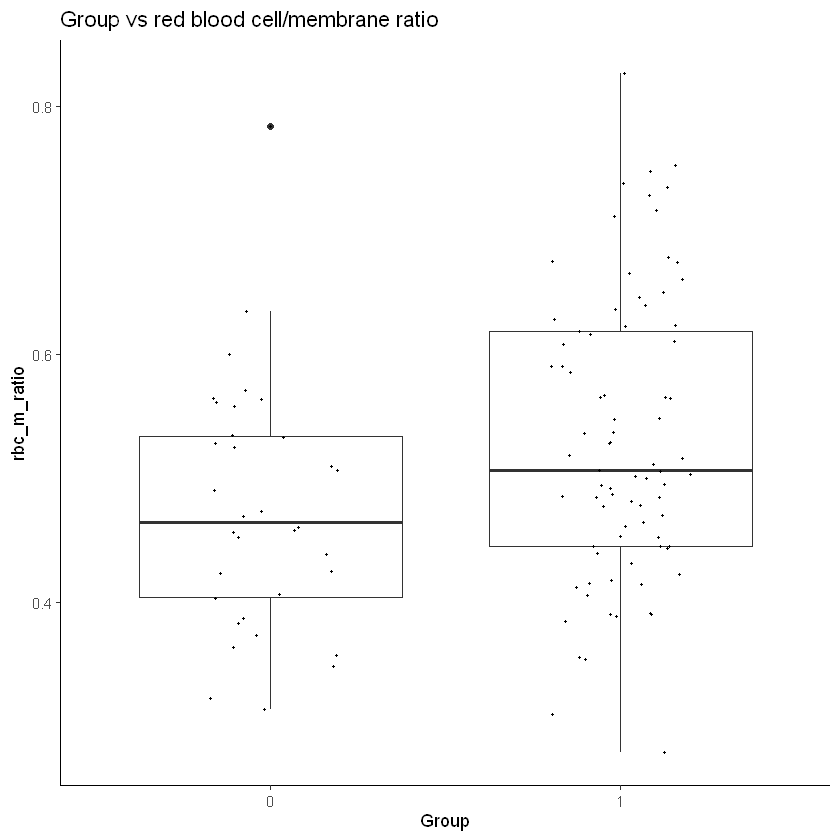

In [5]:
ggplot(data_combined) + 
  geom_boxplot(aes(x=Group, y = rbc_m_ratio))+
  geom_jitter(aes(x=Group, y = rbc_m_ratio), width = 0.2, height = 0,
              shape = 16, size = 0.5, color = "black")+
  labs(title = "Group vs red blood cell/membrane ratio", x = "Group", y = "rbc_m_ratio")+
  theme_classic()

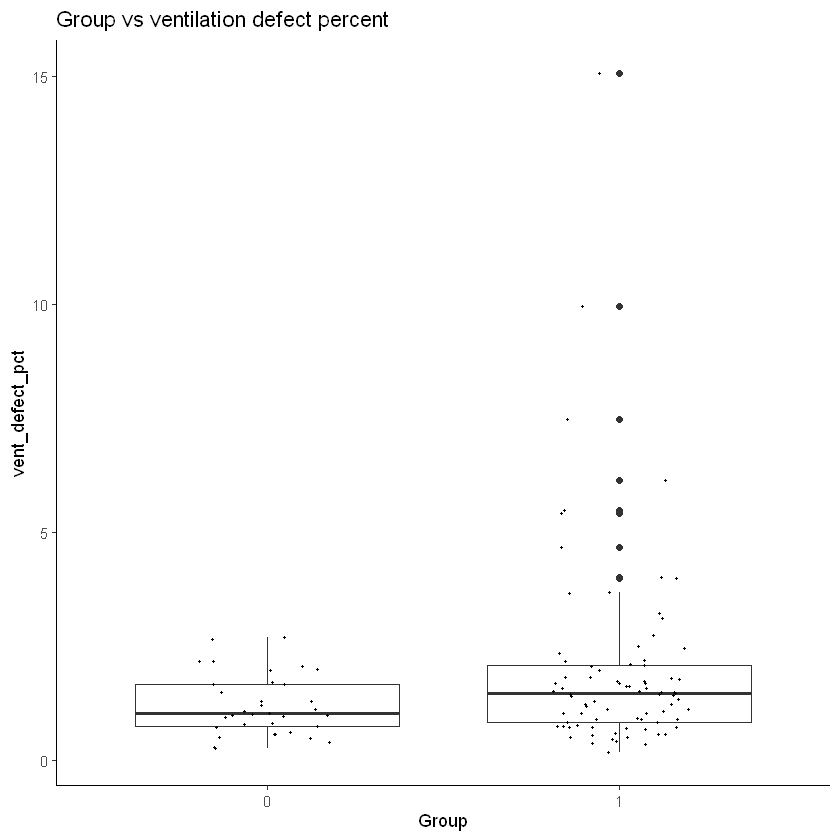

In [6]:
ggplot(data_combined) + 
  geom_boxplot(aes(x=Group, y = vent_defect_pct))+
  geom_jitter(aes(x=Group, y = vent_defect_pct), width = 0.2, height = 0,
              shape = 16, size = 0.5, color = "black")+
  labs(title = "Group vs ventilation defect percent", x = "Group", y = "vent_defect_pct")+
  theme_classic()

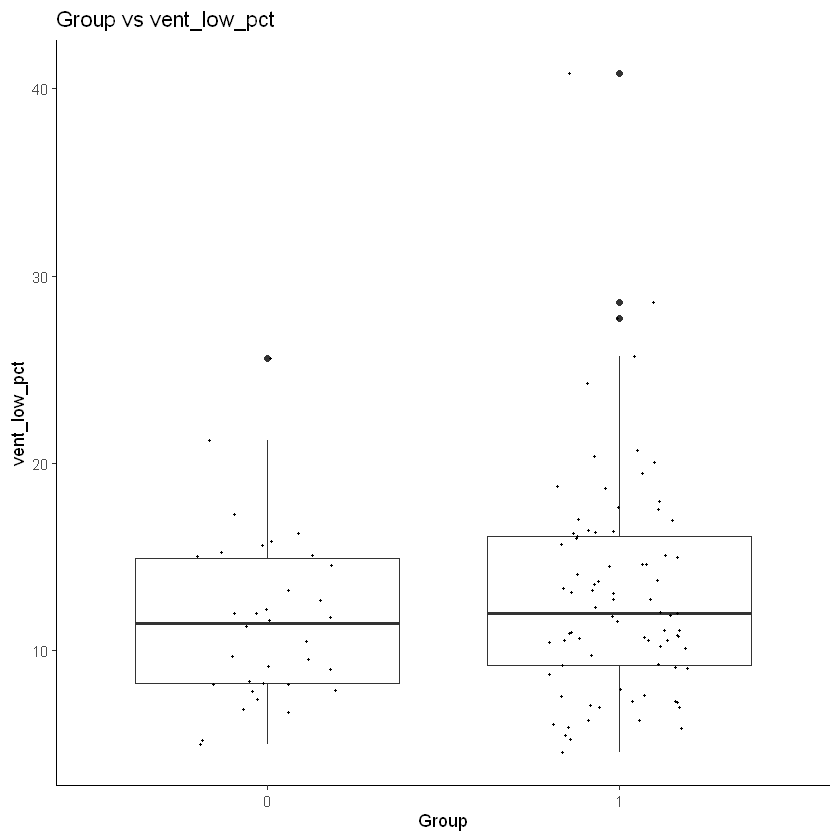

In [7]:
ggplot(data_combined) + 
  geom_boxplot(aes(x=Group, y = vent_low_pct))+
  geom_jitter(aes(x=Group, y = vent_low_pct), width = 0.2, height = 0,
              shape = 16, size = 0.5, color = "black")+
  labs(title = "Group vs vent_low_pct", x = "Group", y = "vent_low_pct")+
  theme_classic()

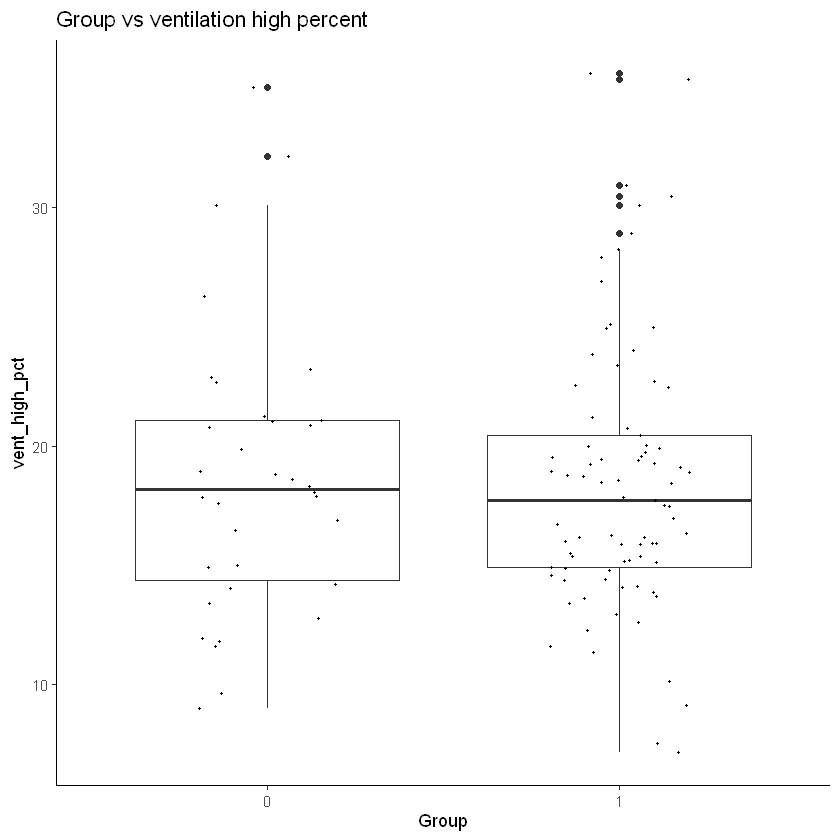

In [8]:
ggplot(data_combined) + 
  geom_boxplot(aes(x=Group, y = vent_high_pct))+
  geom_jitter(aes(x=Group, y = vent_high_pct), width = 0.2, height = 0,
              shape = 16, size = 0.5, color = "black")+
  labs(title = "Group vs ventilation high percent", x = "Group", y = "vent_high_pct")+
  theme_classic()

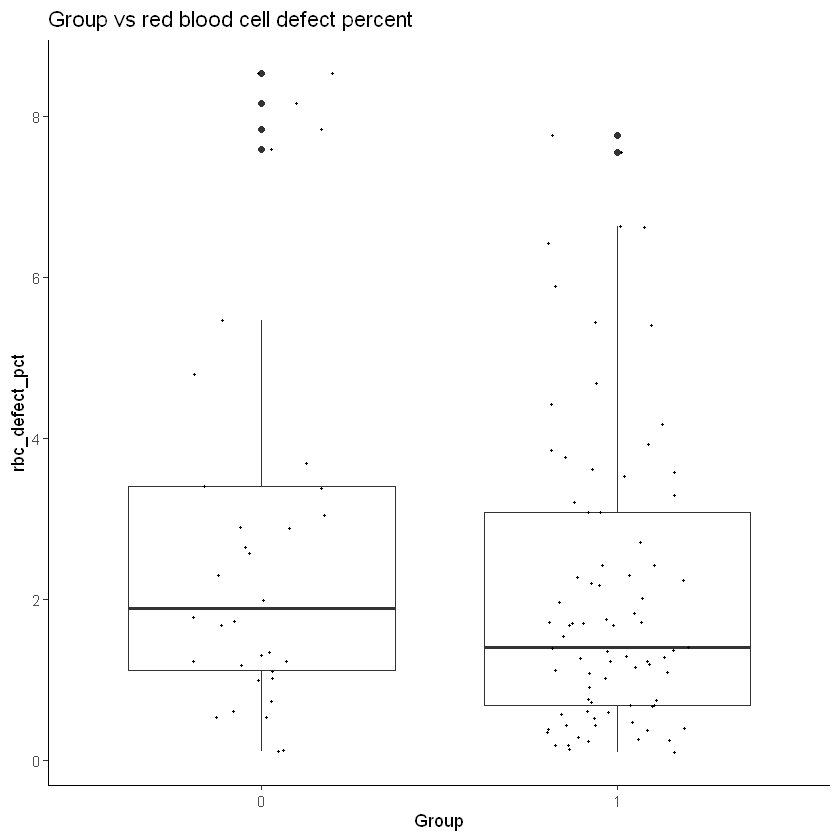

In [9]:
ggplot(data_combined) + 
  geom_boxplot(aes(x=Group, y = rbc_defect_pct))+
  geom_jitter(aes(x=Group, y = rbc_defect_pct), width = 0.2, height = 0,
              shape = 16, size = 0.5, color = "black")+
  labs(title = "Group vs red blood cell defect percent", x = "Group", y = "rbc_defect_pct")+
  theme_classic()

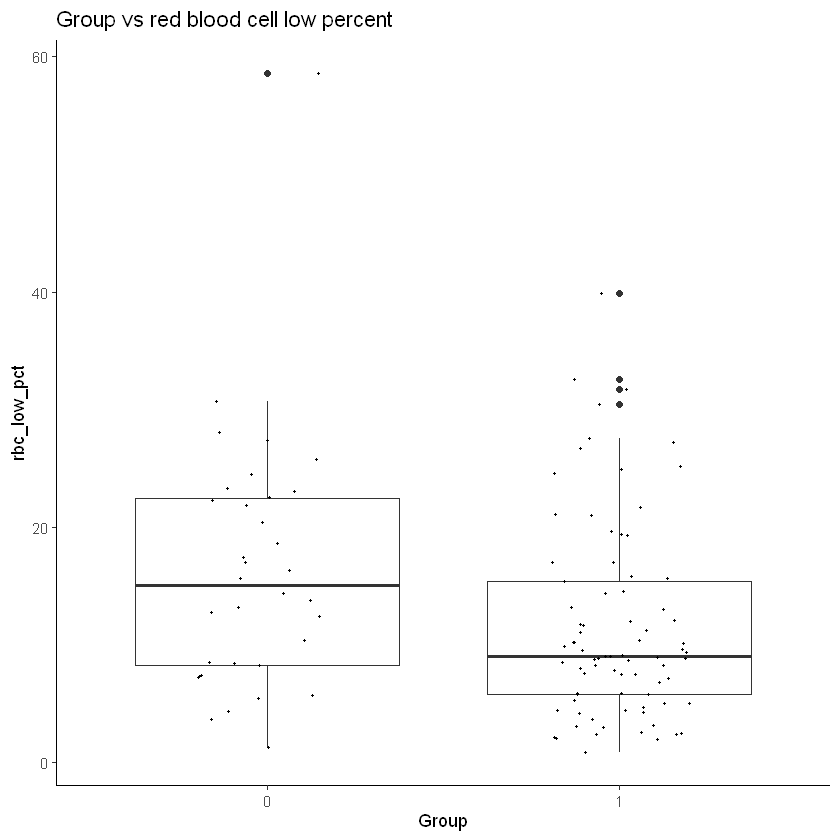

In [10]:
ggplot(data_combined) + 
  geom_boxplot(aes(x=Group, y = rbc_low_pct))+
  geom_jitter(aes(x=Group, y = rbc_low_pct), width = 0.2, height = 0,
              shape = 16, size = 0.5, color = "black")+
  labs(title = "Group vs red blood cell low percent", x = "Group", y = "rbc_low_pct")+
  theme_classic()

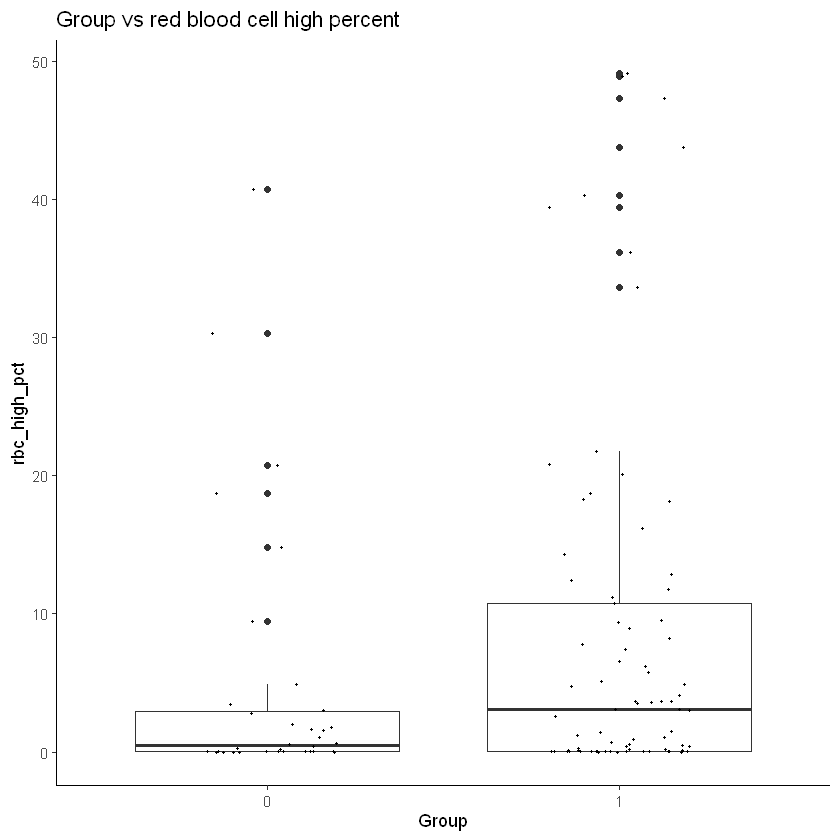

In [11]:
ggplot(data_combined) + 
  geom_boxplot(aes(x=Group, y = rbc_high_pct))+
  geom_jitter(aes(x=Group, y = rbc_high_pct), width = 0.2, height = 0,
              shape = 16, size = 0.5, color = "black")+
  labs(title = "Group vs red blood cell high percent", x = "Group", y = "rbc_high_pct")+
  theme_classic()

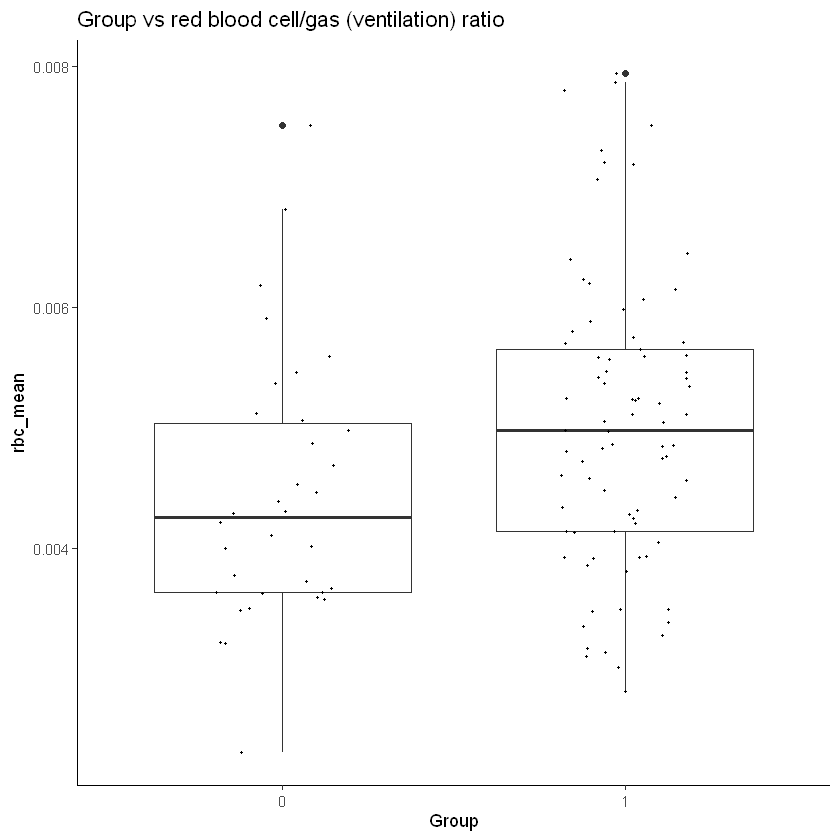

In [12]:
ggplot(data_combined) + 
  geom_boxplot(aes(x=Group, y = rbc_mean))+
  geom_jitter(aes(x=Group, y = rbc_mean), width = 0.2, height = 0,
              shape = 16, size = 0.5, color = "black")+
  labs(title = "Group vs red blood cell/gas (ventilation) ratio", x = "Group", y = "rbc_mean")+
  theme_classic()

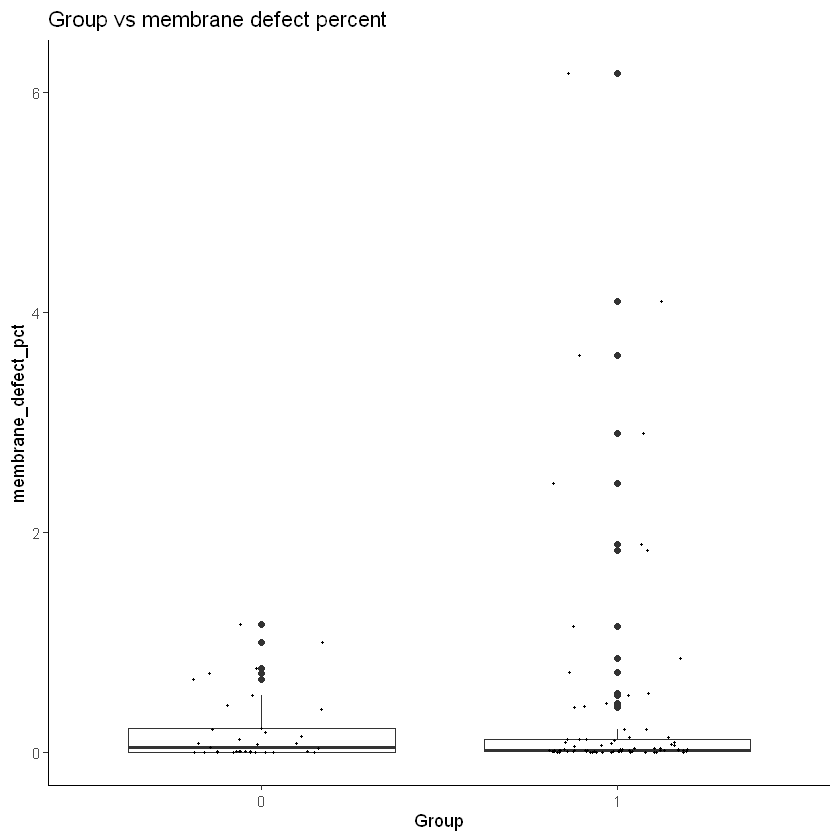

In [13]:
ggplot(data_combined) + 
  geom_boxplot(aes(x=Group, y = membrane_defect_pct))+
  geom_jitter(aes(x=Group, y = membrane_defect_pct), width = 0.2, height = 0,
              shape = 16, size = 0.5, color = "black")+
  labs(title = "Group vs membrane defect percent", x = "Group", y = "membrane_defect_pct")+
  theme_classic()

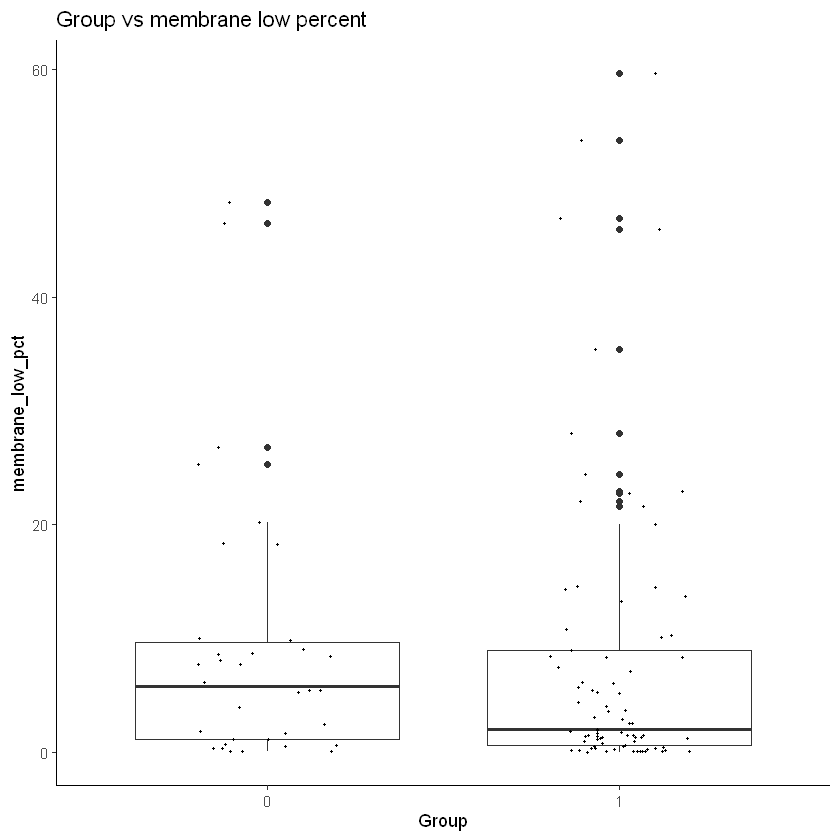

In [14]:
ggplot(data_combined) + 
  geom_boxplot(aes(x=Group, y = membrane_low_pct))+
  geom_jitter(aes(x=Group, y = membrane_low_pct), width = 0.2, height = 0,
              shape = 16, size = 0.5, color = "black")+
  labs(title = "Group vs membrane low percent", x = "Group", y = "membrane_low_pct")+
  theme_classic()

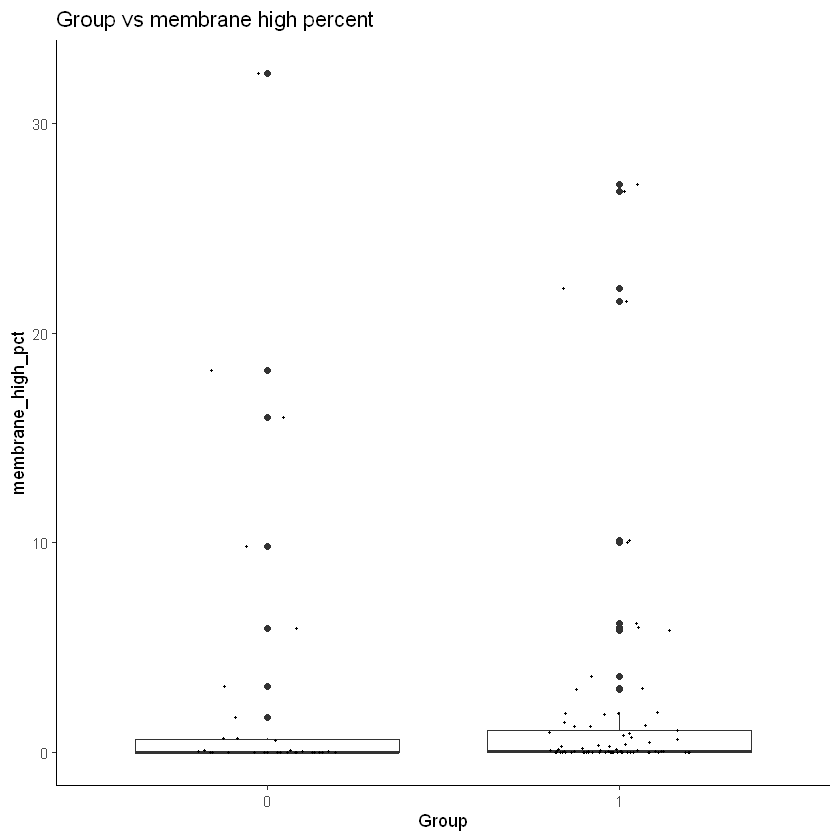

In [15]:
ggplot(data_combined) + 
  geom_boxplot(aes(x=Group, y = membrane_high_pct))+
  geom_jitter(aes(x=Group, y = membrane_high_pct), width = 0.2, height = 0,
              shape = 16, size = 0.5, color = "black")+
  labs(title = "Group vs membrane high percent", x = "Group", y = "membrane_high_pct")+
  theme_classic()

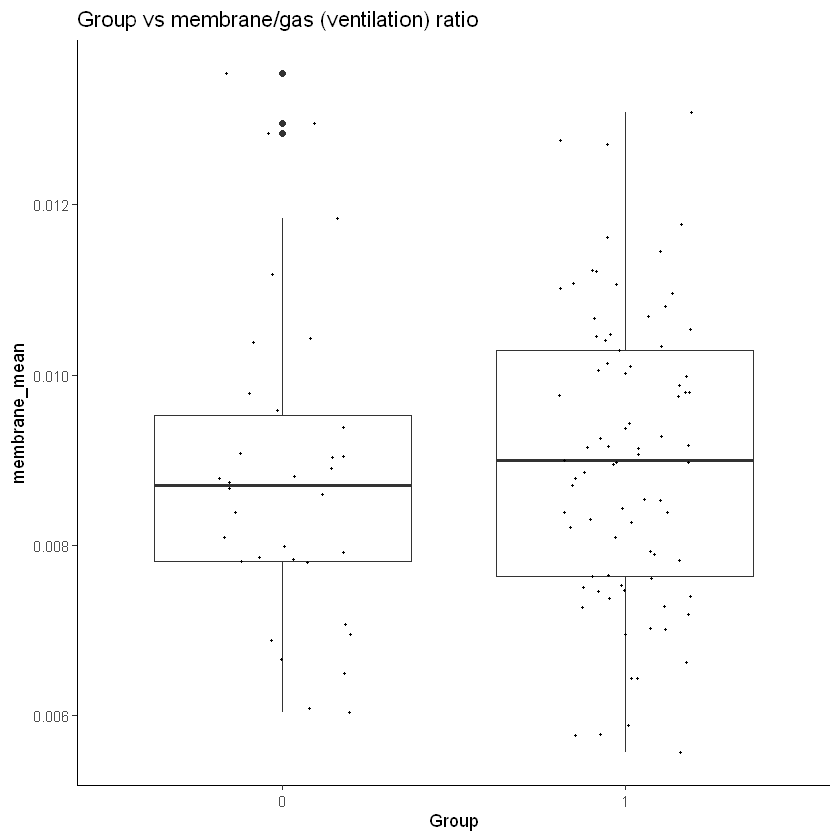

In [16]:
ggplot(data_combined) + 
  geom_boxplot(aes(x=Group, y = membrane_mean))+
  geom_jitter(aes(x=Group, y = membrane_mean), width = 0.2, height = 0,
              shape = 16, size = 0.5, color = "black")+
  labs(title = "Group vs membrane/gas (ventilation) ratio", x = "Group", y = "membrane_mean")+
  theme_classic()